## Imports

In [1]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")

from src.load_explanations import load_explanations_of_many_models, _unify_lenths, _trim_image_path
from src import strings_to_classes_mappings

from src.compare_explanations import compare_explanations, cosine_similarity_distance_with_stdev_and_mean, radial_basis_function_distance_with_stdev_and_mean
from src.load_explanations import load_explanations_of_many_models

os.chdir(current_file_dir)

# Usage example

Get possible models etc.

In [2]:
print("Possible datasets:", list(strings_to_classes_mappings.datasets_mapping.keys()))
print("Possible models:", list(strings_to_classes_mappings.models_mapping.keys()))
print("Possible explanations:", list(strings_to_classes_mappings.explanations_mapping.keys()))
models_list = list(strings_to_classes_mappings.models_mapping.keys())

Possible datasets: ['imagenette2']
Possible models: ['ConvNeXtV2_Nano', 'DeiT_S', 'DeiT_T', 'DenseNet121', 'EfficientNet_B3', 'EfficientNet_B4', 'MobileNetV3', 'PyramidViT_V2_B2', 'Res2Net50', 'ResNet18', 'ResNet50', 'ResNeXt50', 'Swin_T', 'ViT_B_32']
Possible explanations: ['GradCAM', 'IntegratedGradients', 'KernelSHAP']


# Loading data

In [3]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")
from src.utils import models_to_architecture_mapping
os.chdir(current_file_dir)

In [4]:
similarity_matriced_csvs = [f for f in os.listdir('.') if f.endswith('.csv') and f.startswith('dissimilarity_matrix')]
similarity_matriced_csvs

['dissimilarity_matrix_kernelshap_cosine.csv',
 'dissimilarity_matrix_kernelshap_rbf.csv']

## Heatmaps of dissimilarities

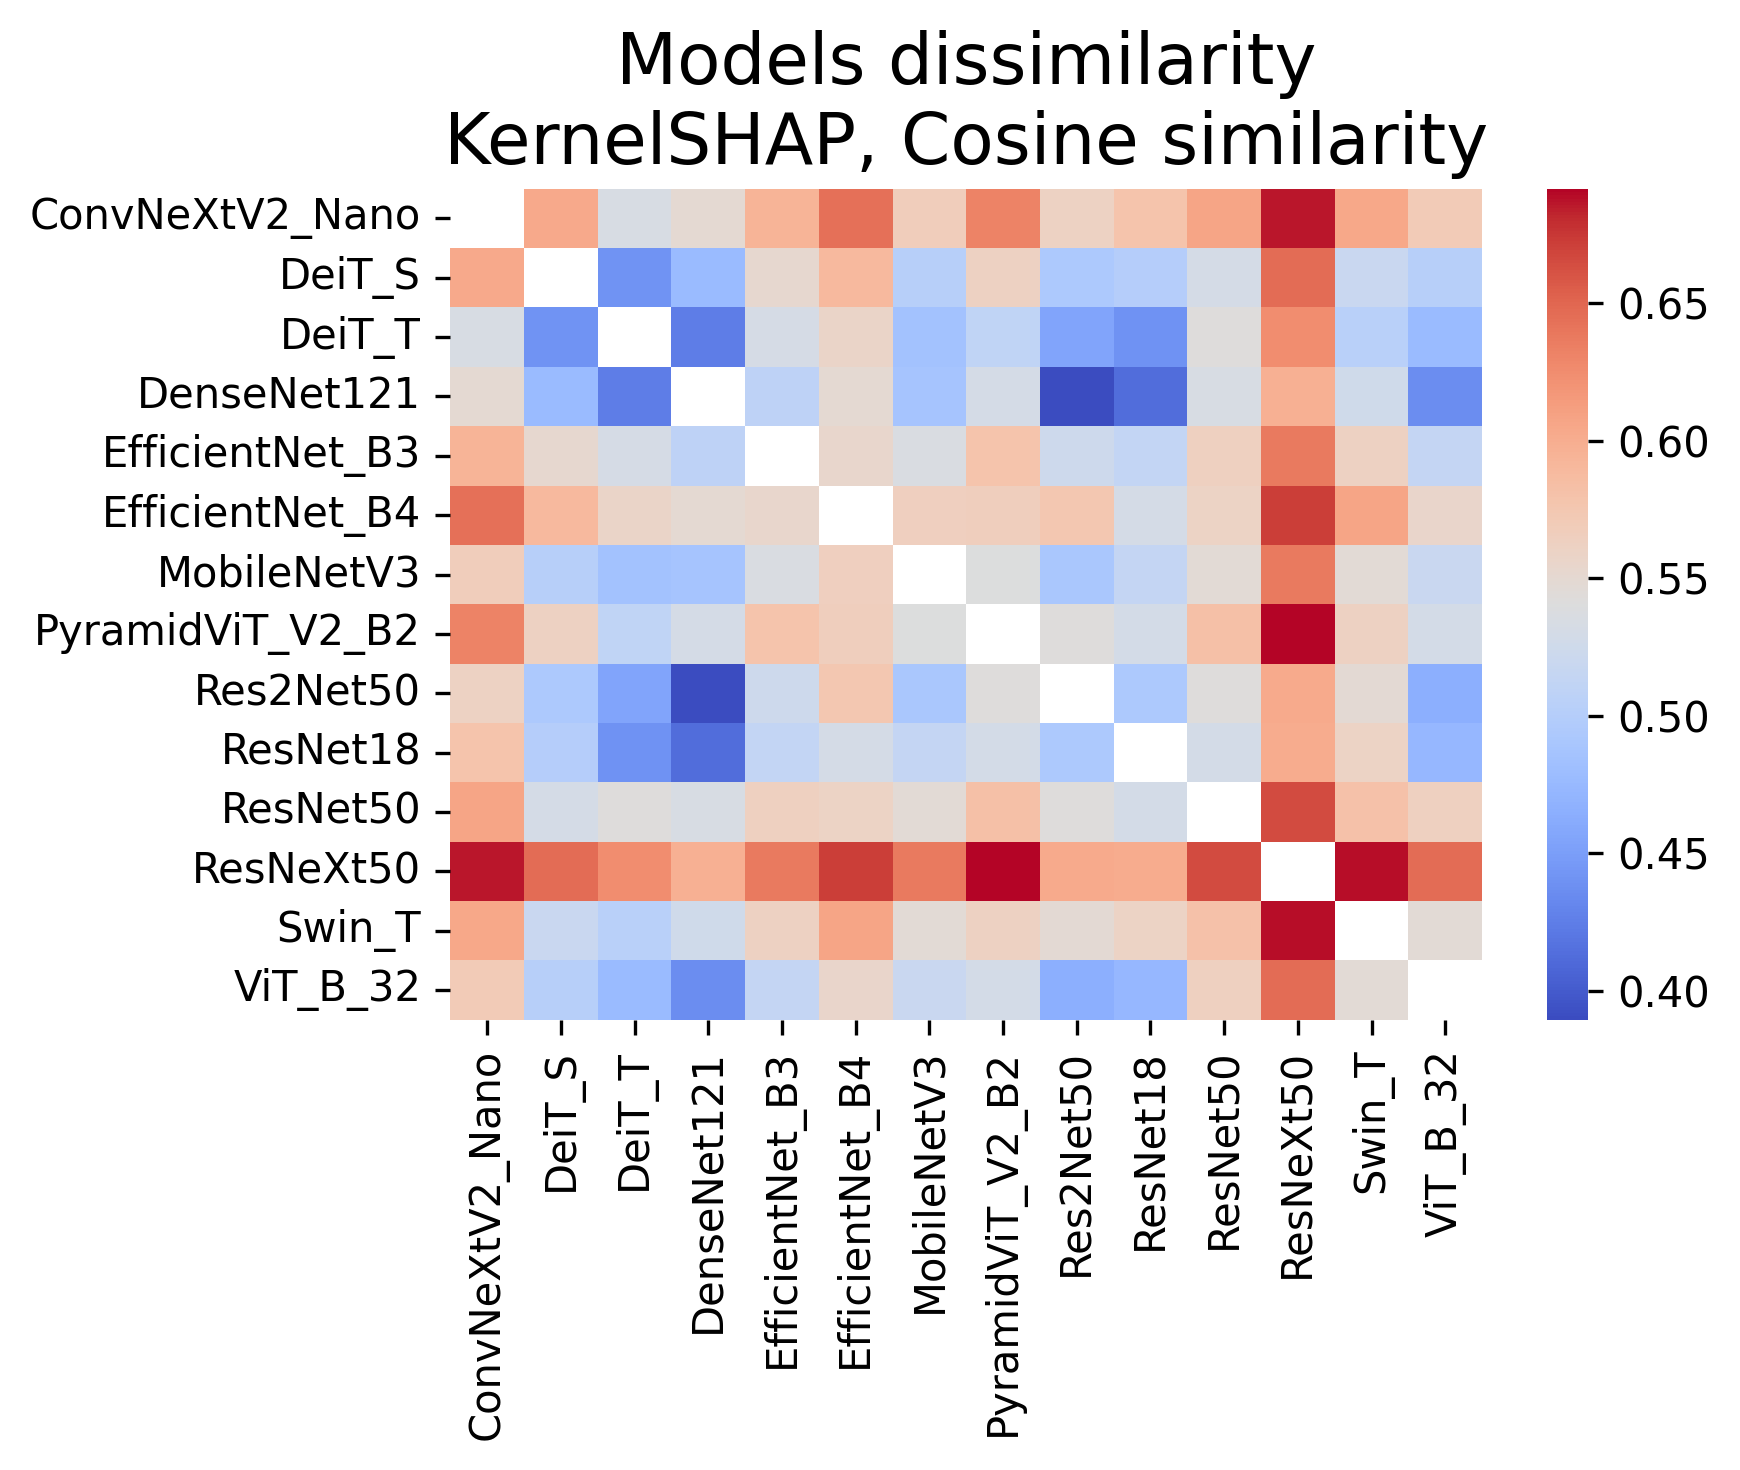

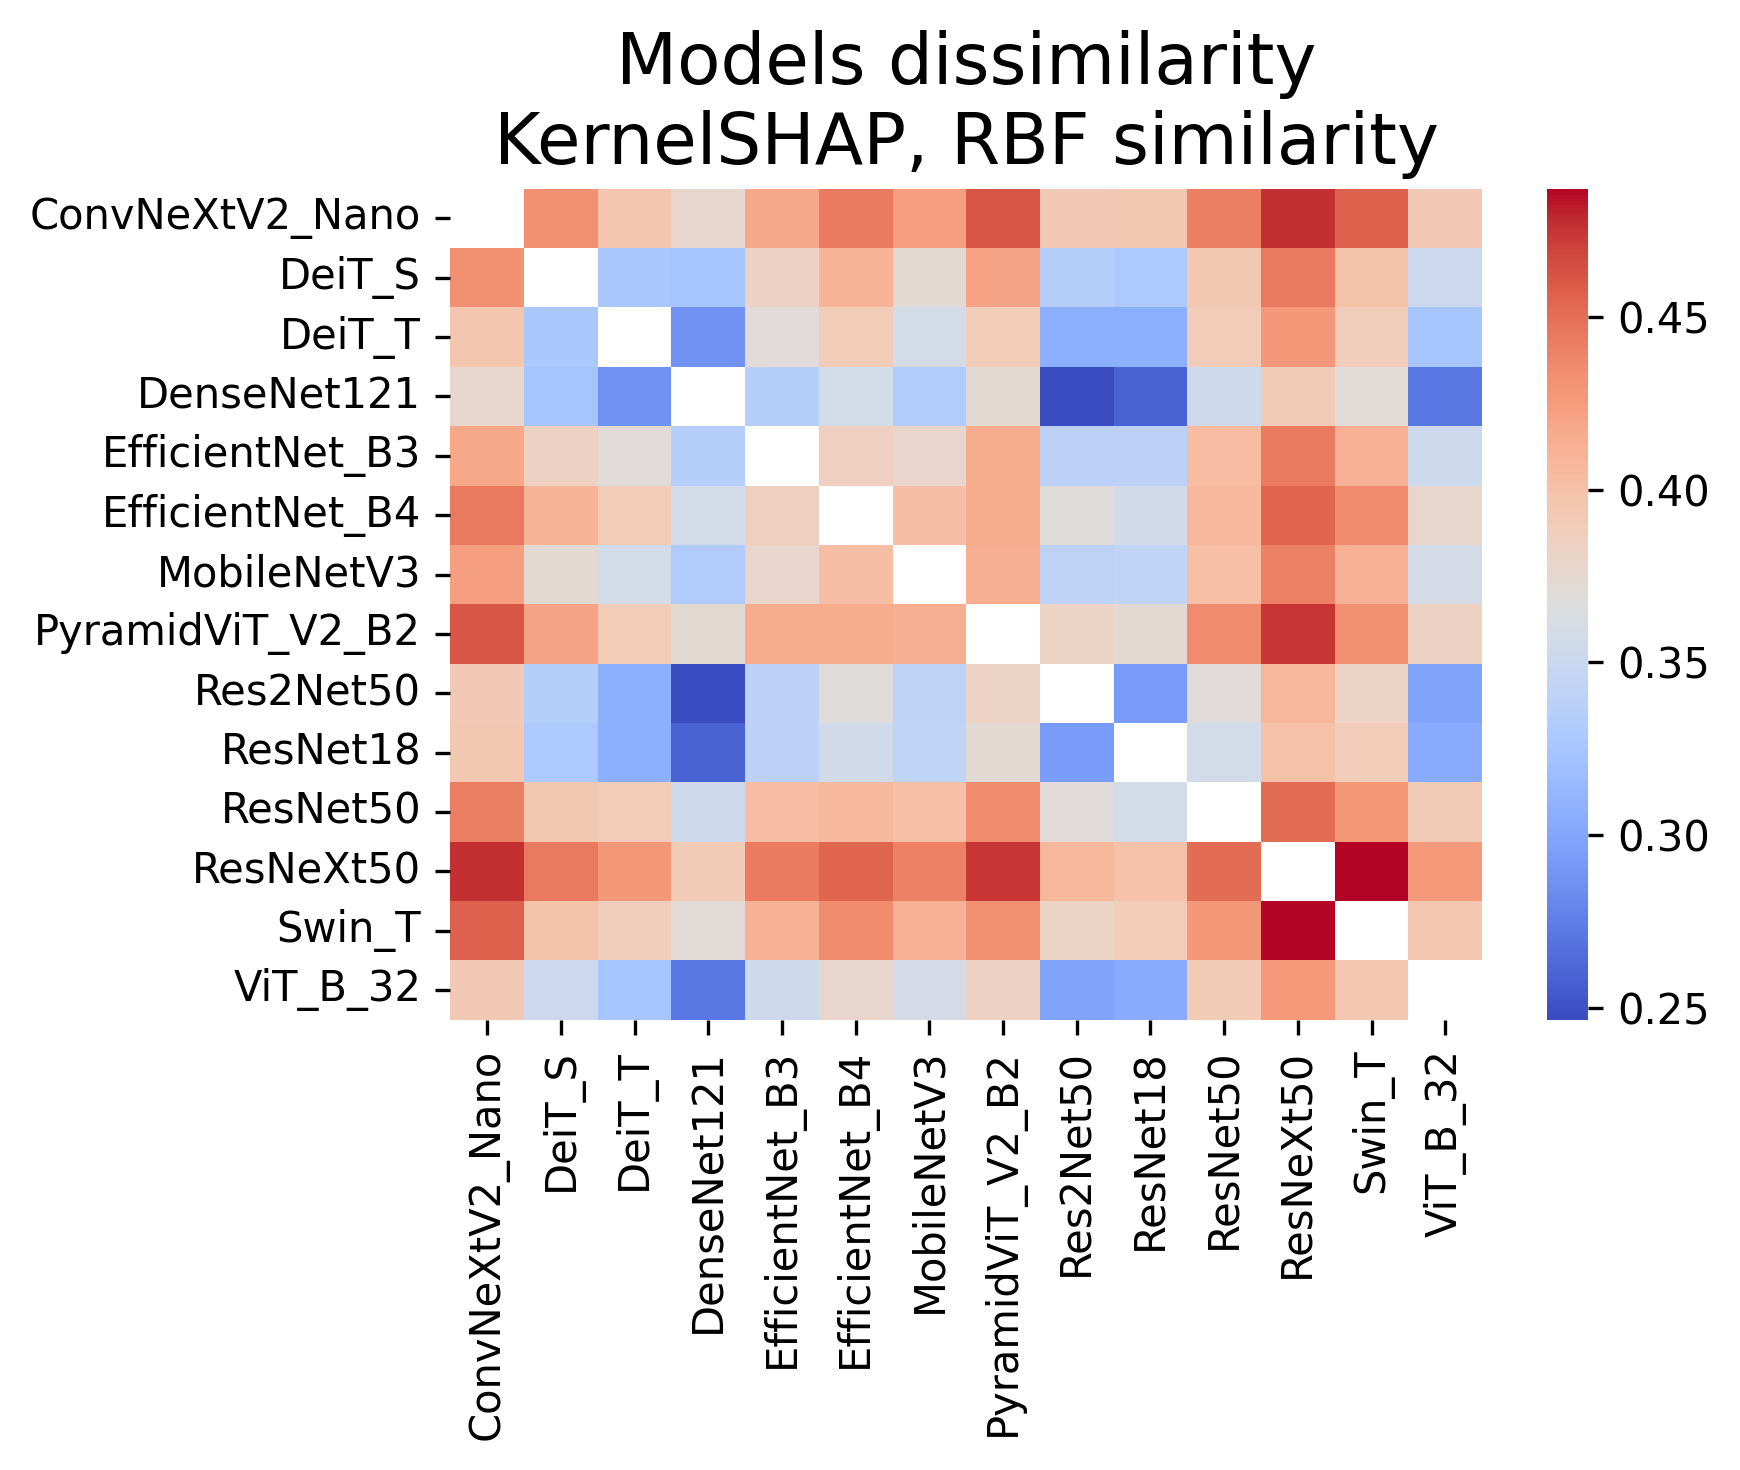

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot heatmap
def plot_heatmap(df, title, output_filename):
    mask = np.eye(df.shape[0], dtype=bool)
    fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
    sns.heatmap(df, mask=mask, cmap='coolwarm', ax=ax)
    plt.title(title, fontsize=17)
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
dissimilarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

# for csv_name in similarity_matriced_csvs:
#     splitted = csv_name.split('_')
#     explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
#     title = f"Graph community detection - Louvain\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
    

for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Models dissimilarity\n{explanation_name_mapping[explanation_method]}, {dissimilarity_name_mapping[similarity_metric]}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
    df = pd.read_csv(csv_name, index_col=0)
    plot_heatmap(df, title=title, output_filename=f"heatmap_{explanation_method}_{similarity_metric}.png")

# Community detection - Louvain

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_partitions, louvain_communities

df = 1 - pd.read_csv(similarity_matriced_csvs[1], index_col=0)

# Remove diagonal and create graph
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
df

ConvNeXtV2_Nano    DeiT_S    DeiT_T  DenseNet121  \
ConvNeXtV2_Nano          0.000000  0.567739  0.604034     0.623421   
DeiT_S                   0.567739  0.000000  0.672083     0.676216   
DeiT_T                   0.604034  0.672083  0.000000     0.713186   
DenseNet121              0.623421  0.676216  0.713186     0.000000   
EfficientNet_B3          0.581841  0.617102  0.629384     0.664436   
EfficientNet_B4          0.555336  0.590148  0.610426     0.642813   
MobileNetV3              0.576472  0.627161  0.642164     0.668443   
PyramidViT_V2_B2         0.539160  0.579235  0.610428     0.627119   
Res2Net50                0.607268  0.664217  0.692723     0.753381   
ResNet18                 0.606790  0.670826  0.693713     0.740950   
ResNet50                 0.558163  0.606250  0.610284     0.645684   
ResNeXt50                0.523835  0.555988  0.572813     0.609095   
Swin_T                   0.543636  0.601661  0.611557     0.629081   
ViT_B_32                 0.607002  0.648508  0.674937     0.729222   

                  EfficientNet_B3  EfficientNet_B4  MobileNetV3  \
ConvNeXtV2_Nano          0.581841         0.555336     0.576472   
DeiT_S                   0.617102         0.590148     0.627161   
DeiT_T                   0.629384         0.610426     0.642164   
DenseNet121              0.664436         0.642813     0.668443   
EfficientNet_B3          0.000000         0.613999     0.621666   
EfficientNet_B4          0.613999         0.000000     0.598091   
MobileNetV3              0.621666         0.598091     0.000000   
PyramidViT_V2_B2         0.585181         0.584982     0.586194   
Res2Net50                0.660437         0.630525     0.659187   
ResNet18                 0.660954         0.644198     0.657377   
ResNet50                 0.596001         0.593948     0.598930   
ResNeXt50                0.557013         0.545490     0.559111   
Swin_T                   0.587802         0.565287     0.588703   
ViT_B_32                 0.646519         0.621907     0.641554   

                  PyramidViT_V2_B2  Res2Net50  ResNet18  ResNet50  ResNeXt50  \
ConvNeXtV2_Nano           0.539160   0.607268  0.606790  0.558163   0.523835   
DeiT_S                    0.579235   0.664217  0.670826  0.606250   0.555988   
DeiT_T                    0.610428   0.692723  0.693713  0.610284   0.572813   
DenseNet121               0.627119   0.753381  0.740950  0.645684   0.609095   
EfficientNet_B3           0.585181   0.660437  0.660954  0.596001   0.557013   
EfficientNet_B4           0.584982   0.630525  0.644198  0.593948   0.545490   
MobileNetV3               0.586194   0.659187  0.657377  0.598930   0.559111   
PyramidViT_V2_B2          0.000000   0.617619  0.626853  0.564568   0.525606   
Res2Net50                 0.617619   0.000000  0.706936  0.629956   0.592513   
ResNet18                  0.626853   0.706936  0.000000  0.642959   0.600756   
ResNet50                  0.564568   0.629956  0.642959  0.000000   0.548735   
ResNeXt50                 0.525606   0.592513  0.600756  0.548735   0.000000   
Swin_T                    0.567926   0.618552  0.609701  0.572348   0.512896   
ViT_B_32                  0.615340   0.701510  0.696670  0.609043   0.573835   

                    Swin_T  ViT_B_32  
ConvNeXtV2_Nano   0.543636  0.607002  
DeiT_S            0.601661  0.648508  
DeiT_T            0.611557  0.674937  
DenseNet121       0.629081  0.729222  
EfficientNet_B3   0.587802  0.646519  
EfficientNet_B4   0.565287  0.621907  
MobileNetV3       0.588703  0.641554  
PyramidViT_V2_B2  0.567926  0.615340  
Res2Net50         0.618552  0.701510  
ResNet18          0.609701  0.696670  
ResNet50          0.572348  0.609043  
ResNeXt50         0.512896  0.573835  
Swin_T            0.000000  0.605180  
ViT_B_32          0.605180  0.000000

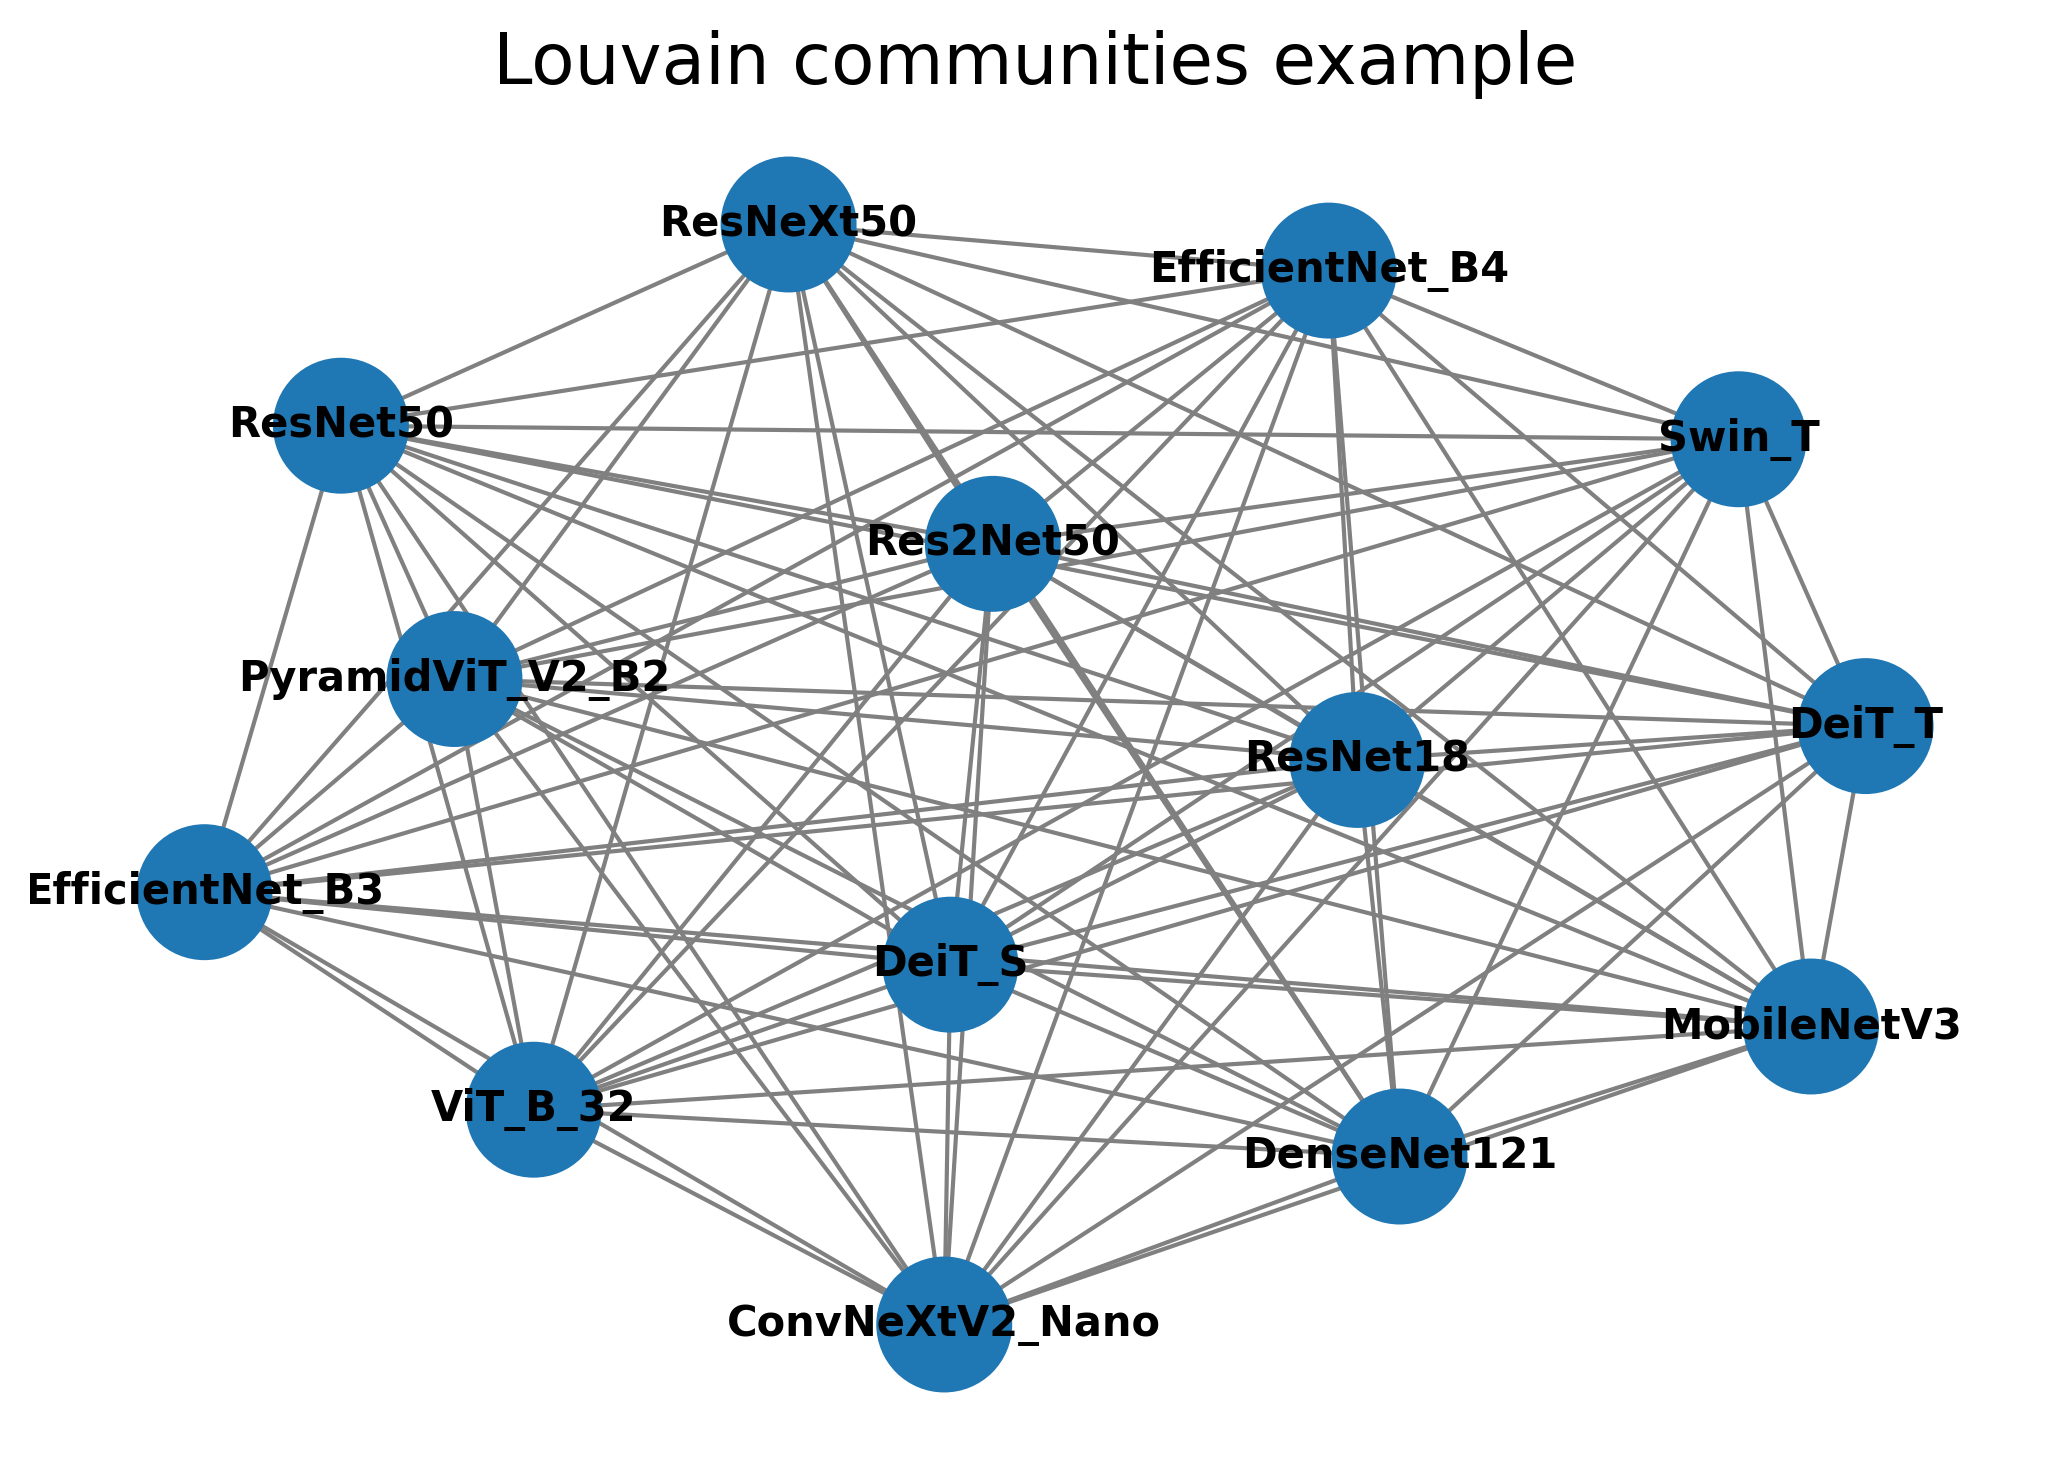

[{'ConvNeXtV2_Nano',
  'DeiT_S',
  'DeiT_T',
  'DenseNet121',
  'EfficientNet_B3',
  'EfficientNet_B4',
  'MobileNetV3',
  'PyramidViT_V2_B2',
  'Res2Net50',
  'ResNeXt50',
  'ResNet18',
  'ResNet50',
  'Swin_T',
  'ViT_B_32'}]

In [7]:
def plot_communities(communities, title, output_filename=None, dpi=300):

    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i

    colors = [node_colors[node] for node in G.nodes]
    plt.figure(figsize=(7,5), dpi=dpi)
    ax = plt.gca()
    ax.set_title(title, fontsize=17)
    nx.draw(G, node_color=colors, with_labels=True, cmap=plt.cm.tab20, node_size=1000, font_size=10, font_color='black', edge_color='gray', font_weight='bold', ax=ax)
    _ = ax.axis('off')
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()


communities = louvain_communities(G, seed=42)
plot_communities(communities, title="Louvain communities example")
communities

In [8]:
tweaked_csv_name_to_resolution_mapping = {
    'dissimilarity_matrix_gradcam_cosine.csv' : 1.06,
    'dissimilarity_matrix_gradcam_rbf.csv' : 1.08,
    'dissimilarity_matrix_integratedgradients_cosine.csv' : 0.807,
    'dissimilarity_matrix_integratedgradients_rbf.csv': 1,
    'dissimilarity_matrix_kernelshap_cosine.csv': 1.065,
    'dissimilarity_matrix_kernelshap_rbf.csv': 1.071,
}

dissimilarity_matrix_kernelshap_cosine.csv


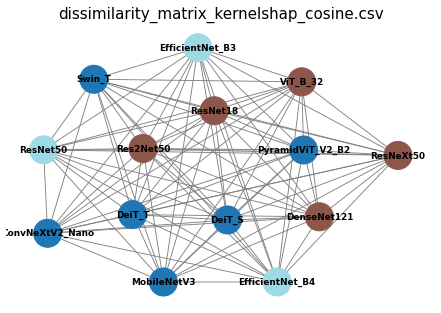

In [9]:
i_to_plot = 0
print(similarity_matriced_csvs[i_to_plot])
df = 1 - pd.read_csv(similarity_matriced_csvs[i_to_plot], index_col=0)
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
resolution = 1.065
communities = louvain_communities(G, resolution=resolution, seed=42)
plot_communities(communities, title=similarity_matriced_csvs[i_to_plot], dpi=64)

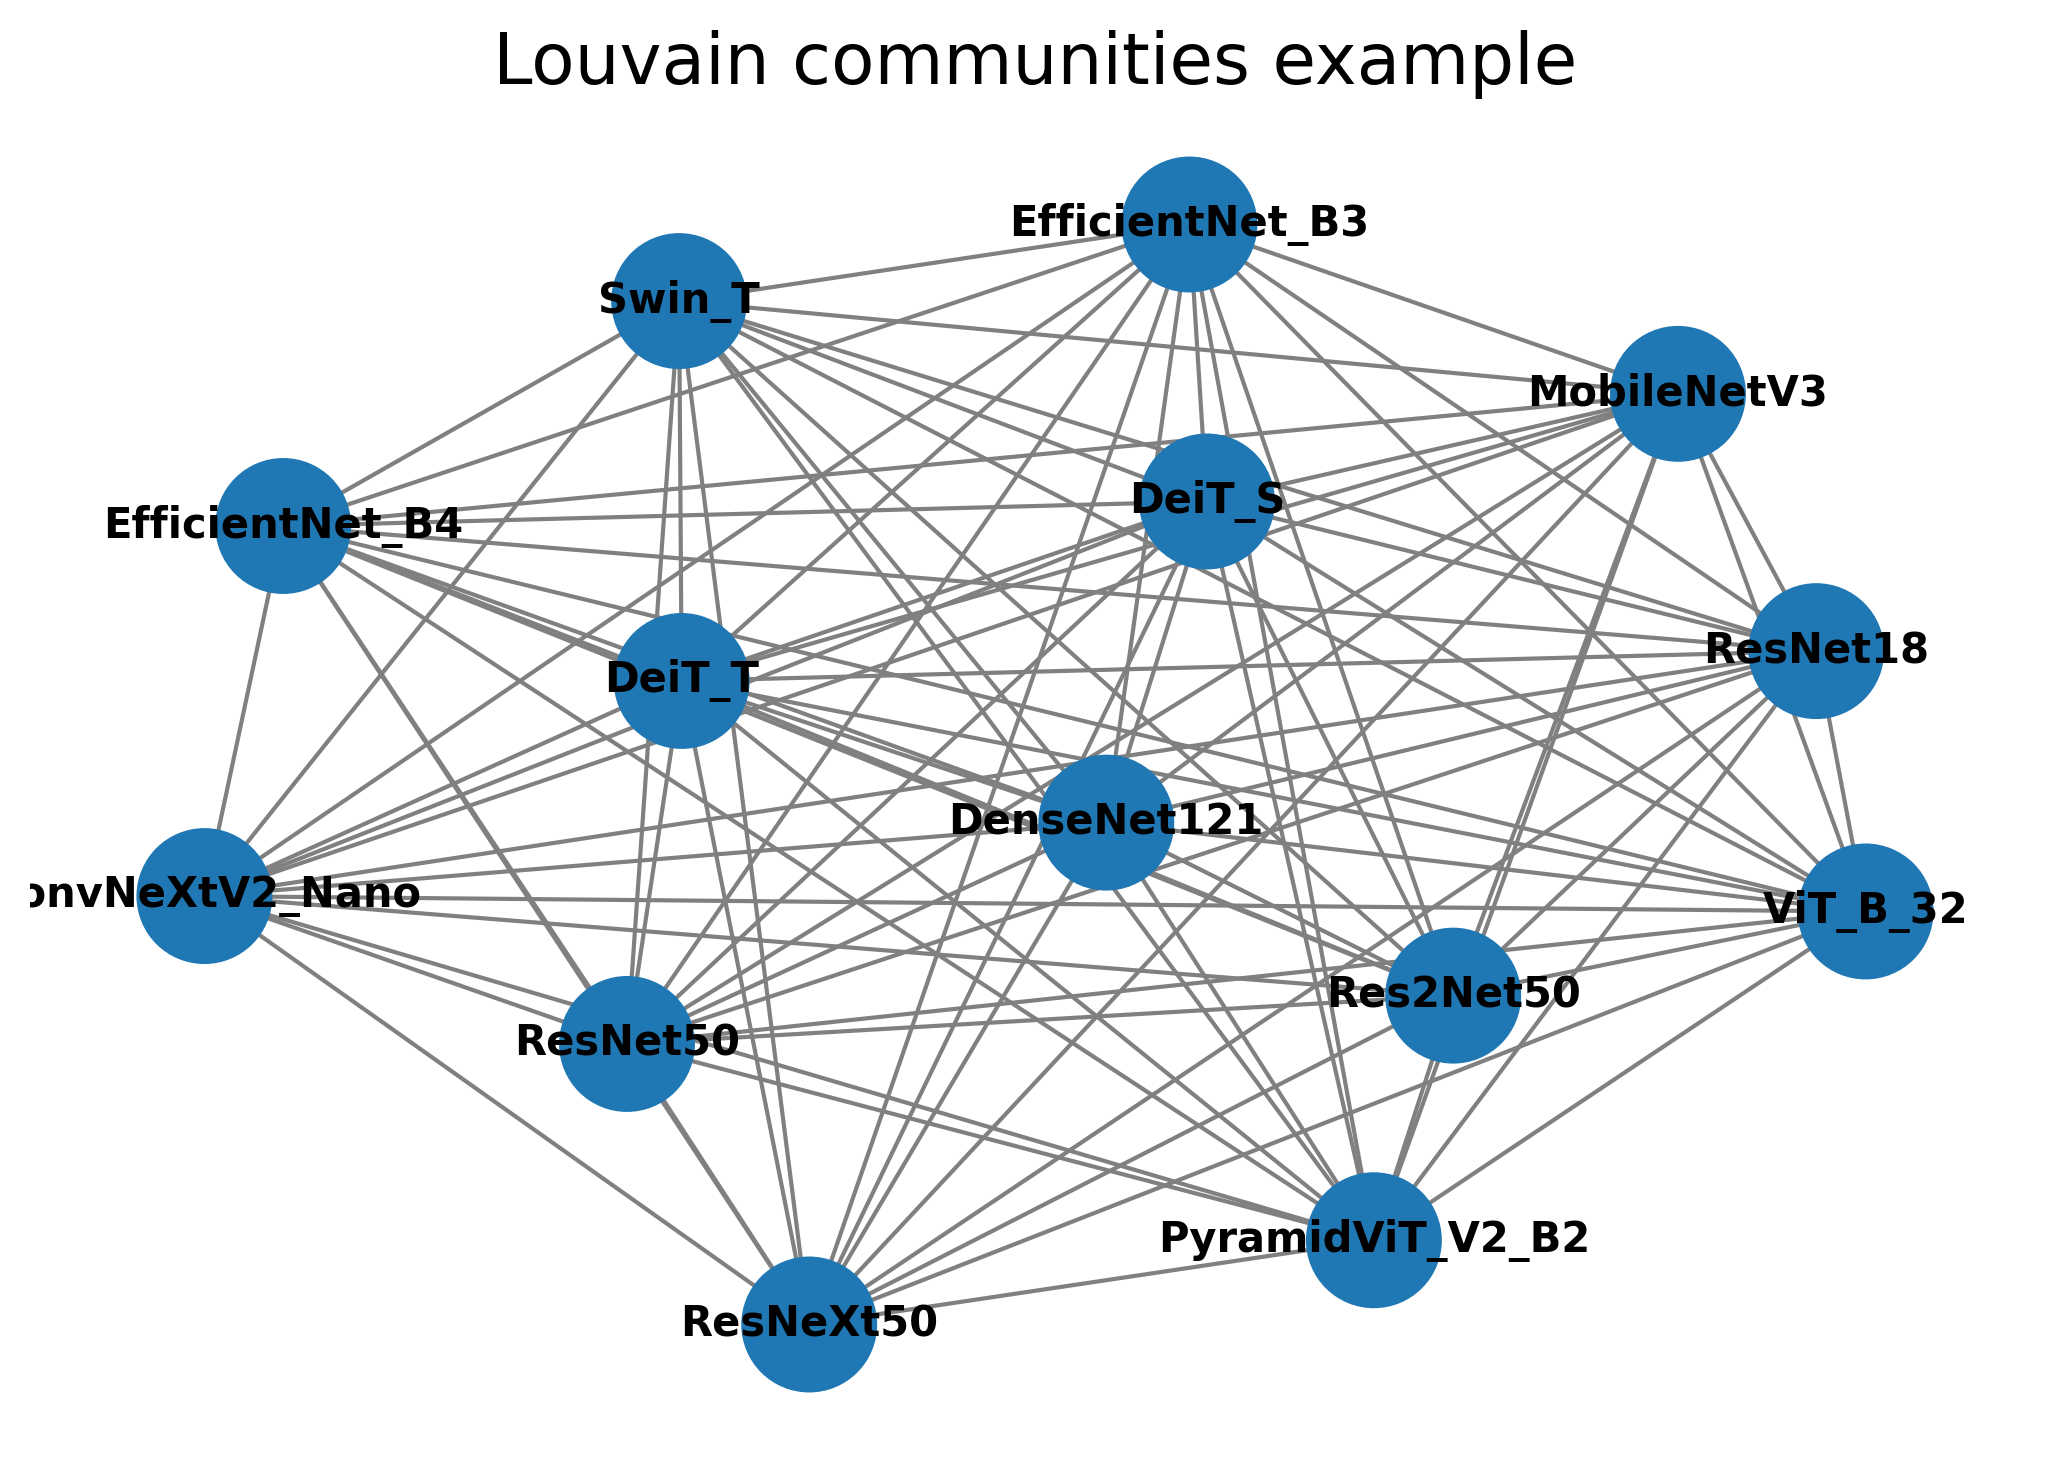

[[{'ConvNeXtV2_Nano',
   'DeiT_S',
   'DeiT_T',
   'DenseNet121',
   'EfficientNet_B3',
   'EfficientNet_B4',
   'MobileNetV3',
   'PyramidViT_V2_B2',
   'Res2Net50',
   'ResNeXt50',
   'ResNet18',
   'ResNet50',
   'Swin_T',
   'ViT_B_32'}]]

In [10]:
communities = list(louvain_partitions(G, resolution=1, threshold=0.0000000001))
for c in communities:
    plot_communities(c, title="Louvain communities example")
communities

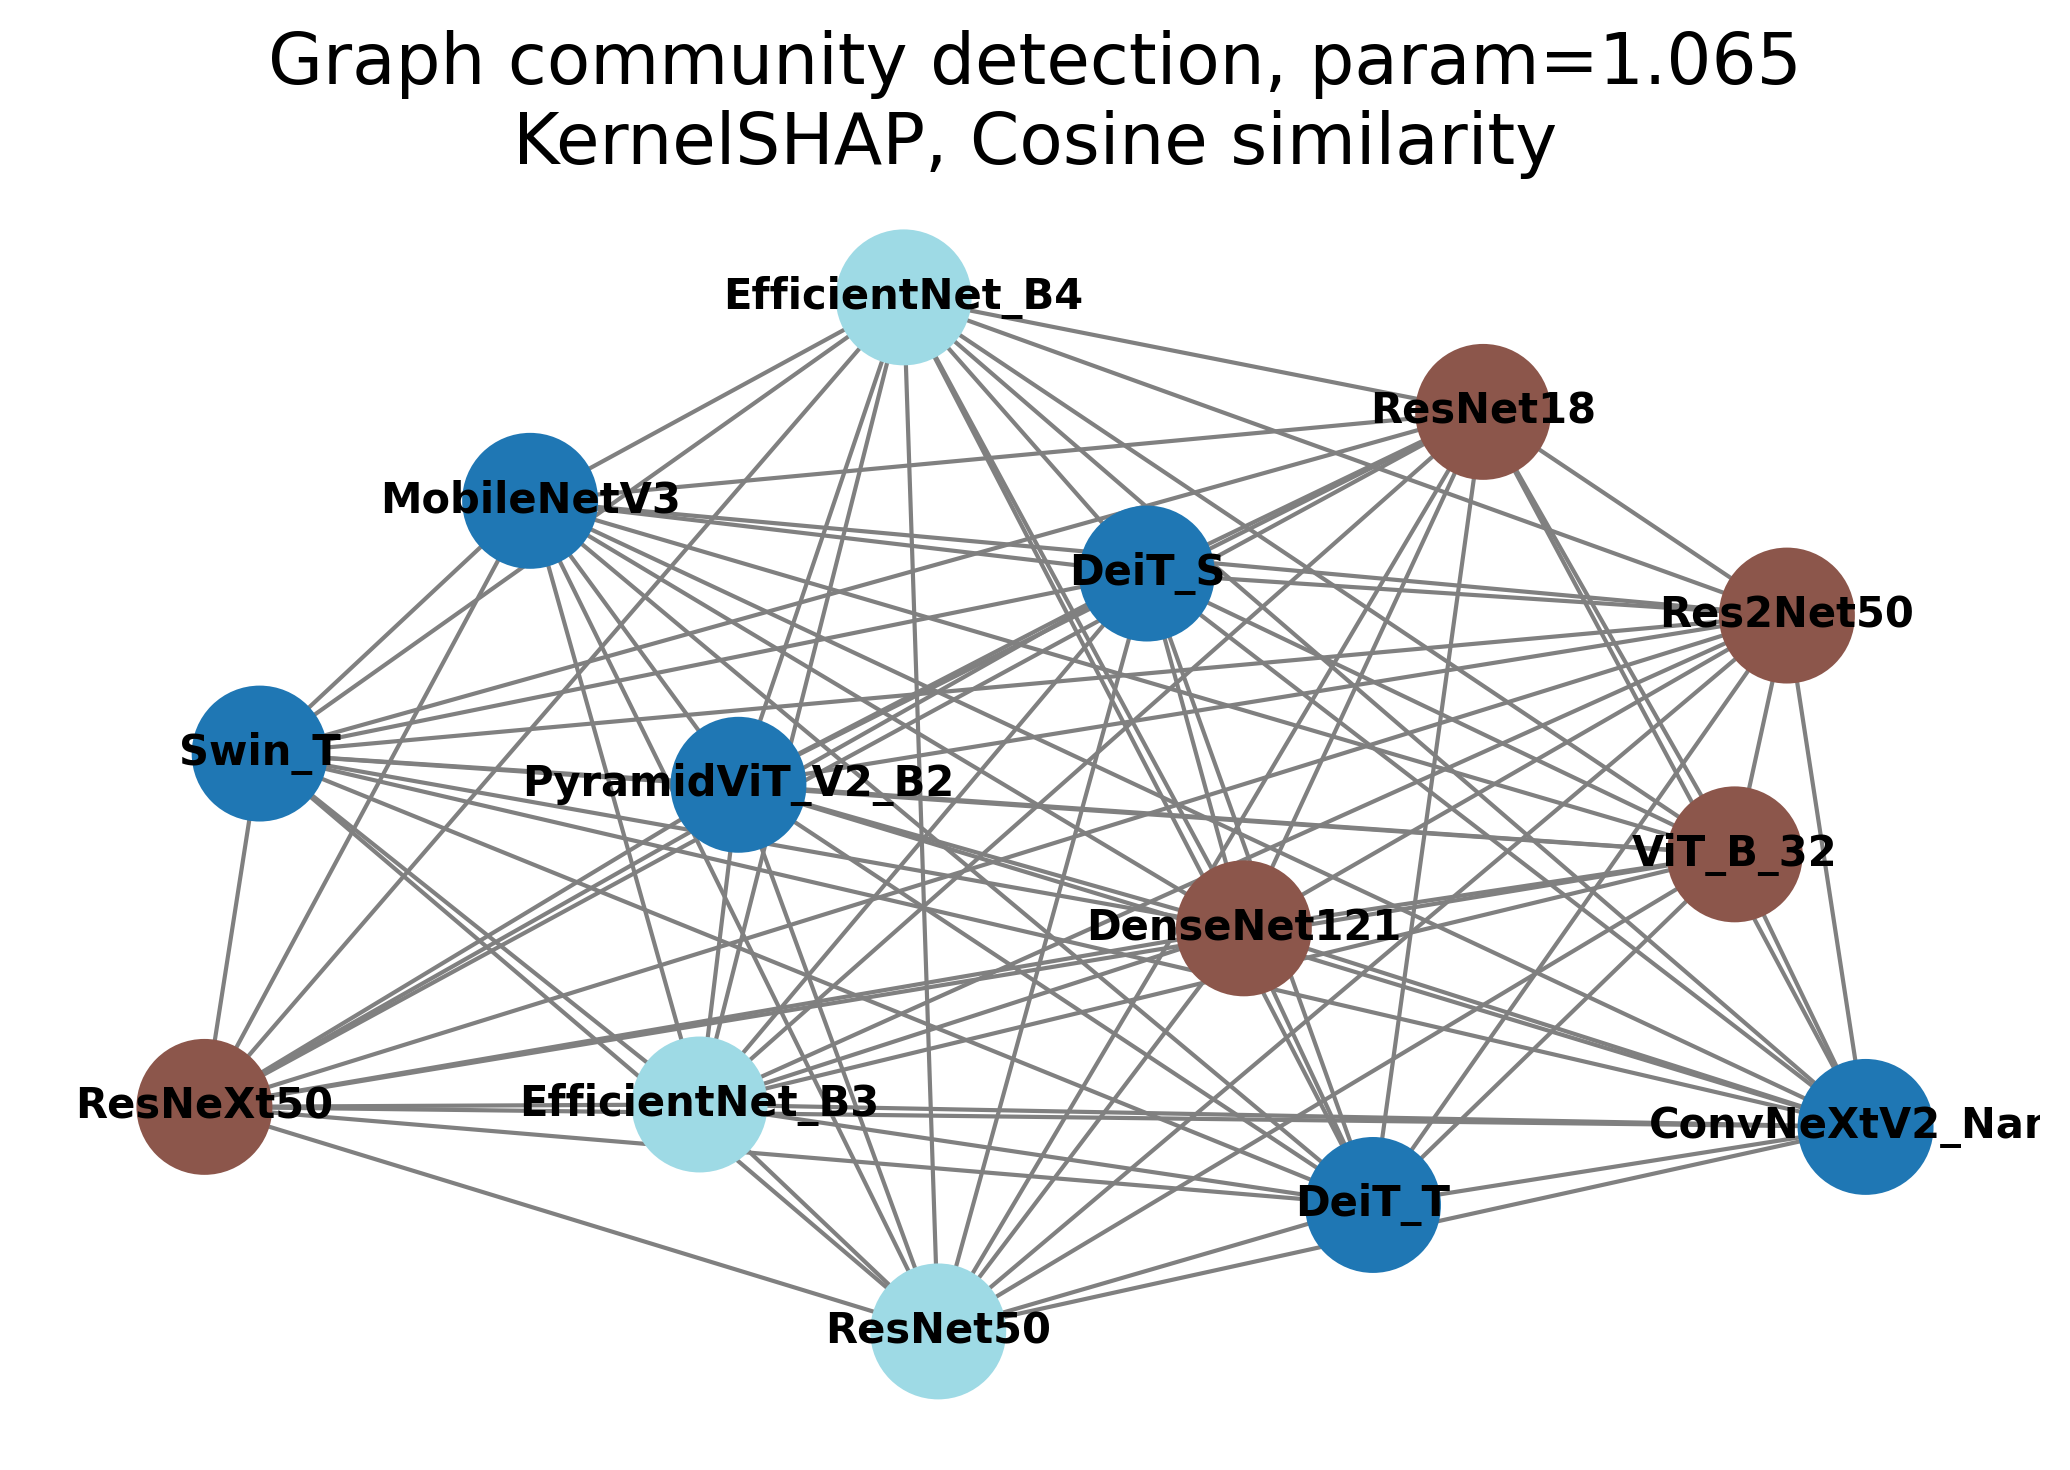

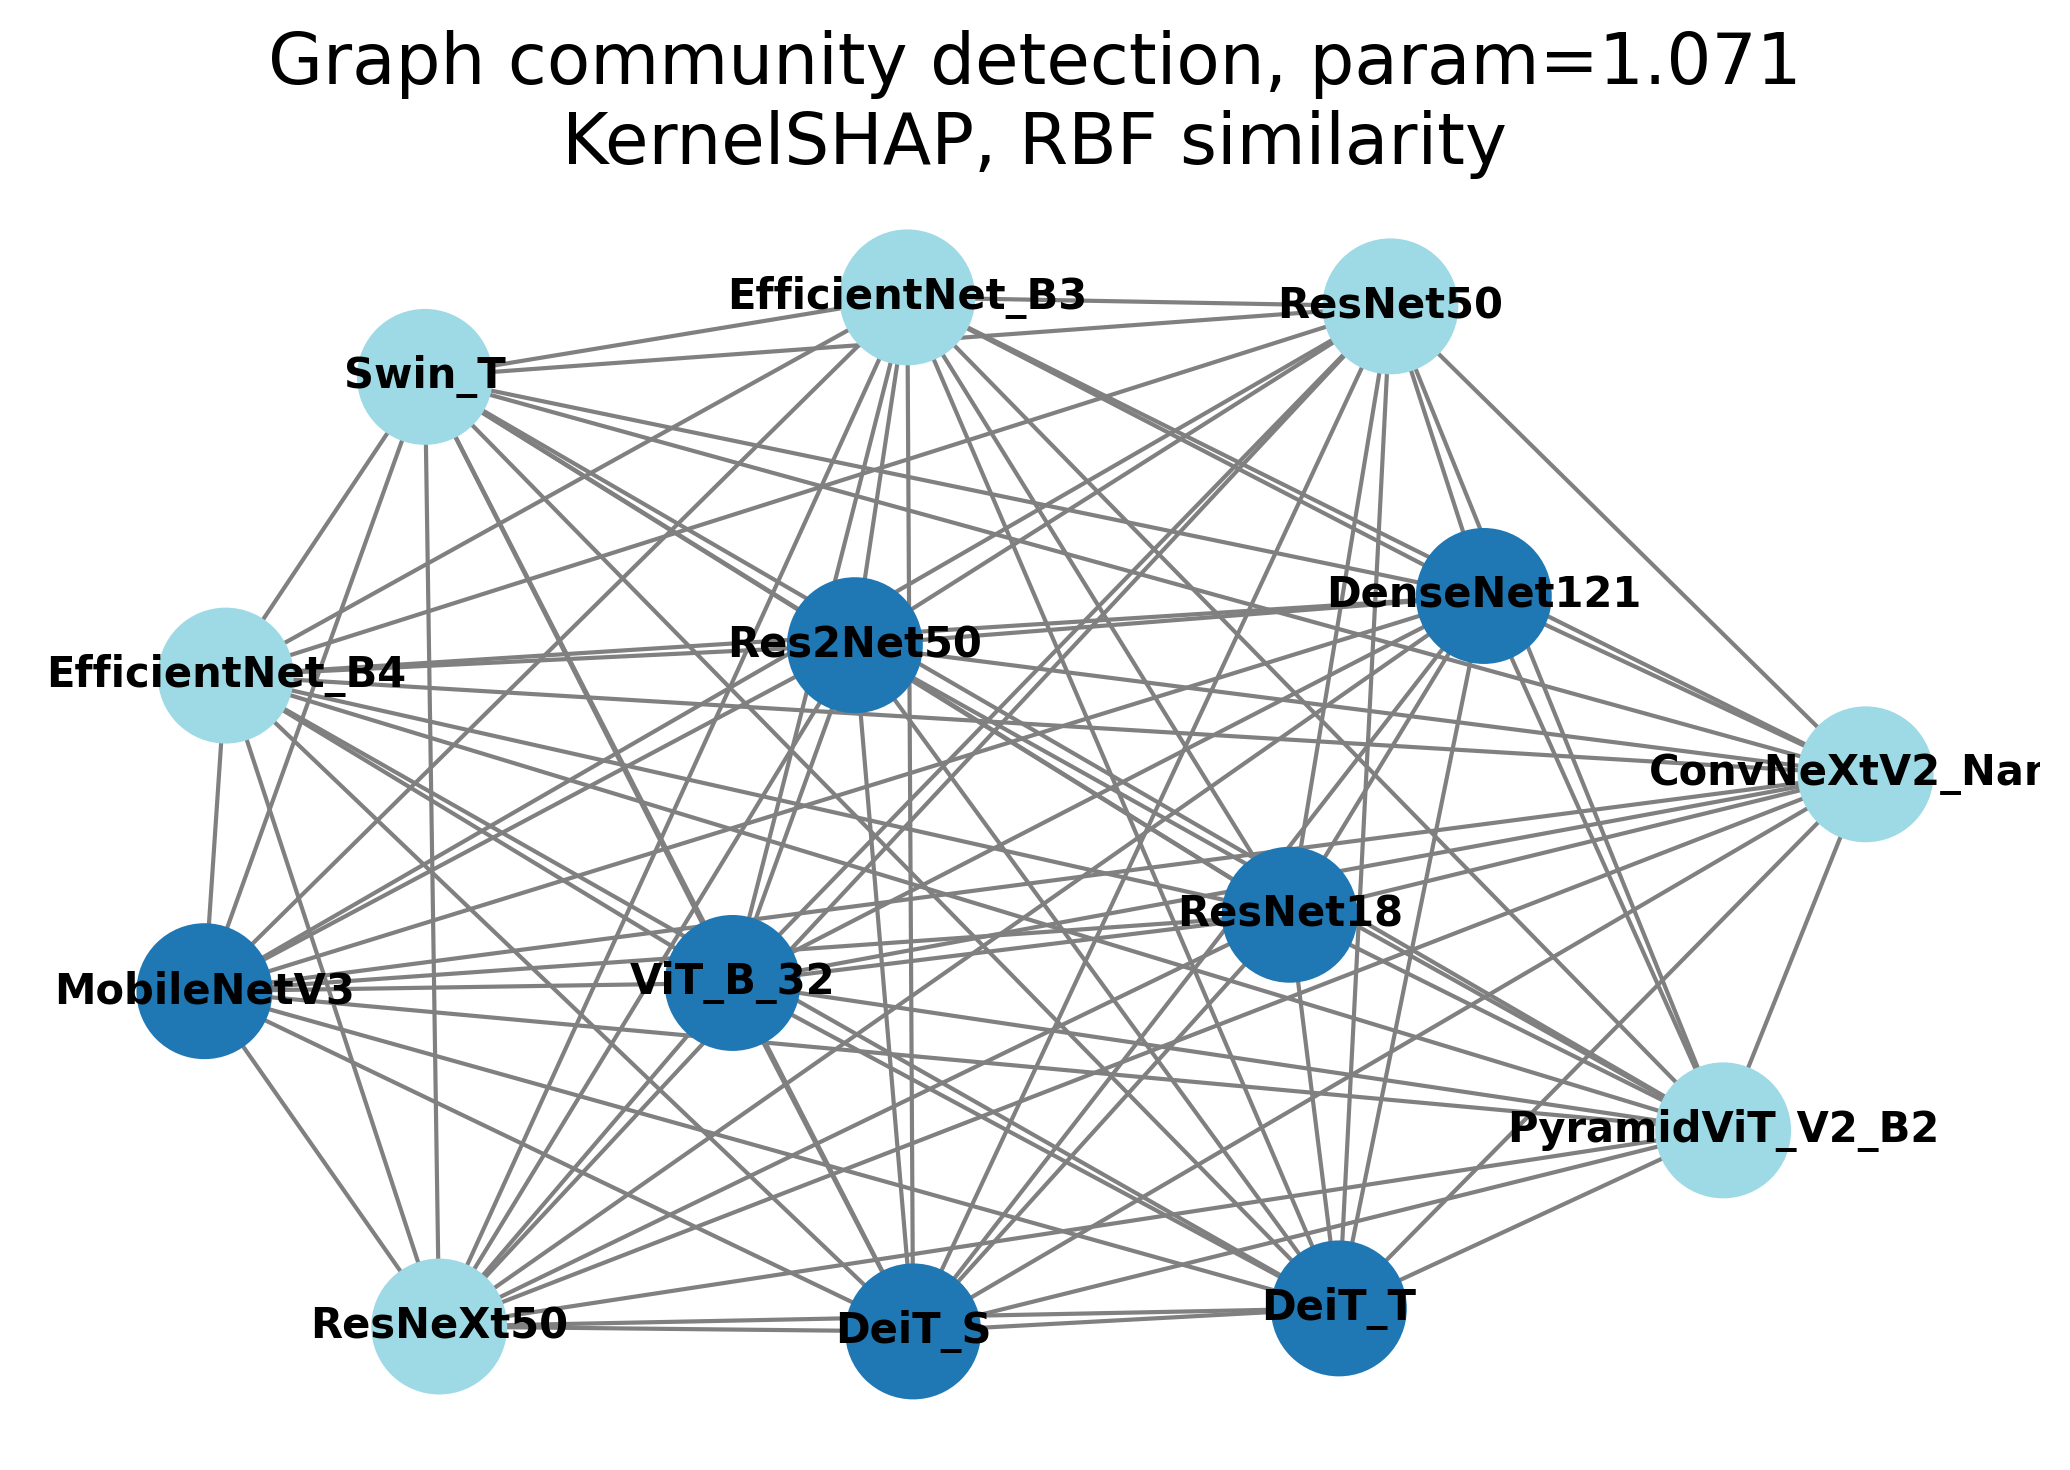

In [11]:
explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
similarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

for csv_name in similarity_matriced_csvs:
    resolution = tweaked_csv_name_to_resolution_mapping[csv_name]
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Graph community detection, param={resolution}\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_all.png'


    # loaded as dissimilarity, so we invert it to similarity by substracting it from 1
    df = 1 - pd.read_csv(csv_name, index_col=0)
    np.fill_diagonal(df.values, 0)
    G = nx.from_pandas_adjacency(df)
    communities = louvain_communities(G, resolution=resolution, seed=42)
    plot_communities(communities, title=title, output_filename=output_filename)


# Hierarchical clustering

In [12]:
# loaded as dissimilarity, so we invert it to similarity by substracting it from 1
df = 1 - pd.read_csv(similarity_matriced_csvs[0], index_col=0)
np.fill_diagonal(df.values, 1)
df

ConvNeXtV2_Nano    DeiT_S    DeiT_T  DenseNet121  \
ConvNeXtV2_Nano          1.000000  0.395886  0.466251     0.450926   
DeiT_S                   0.395886  1.000000  0.558788     0.523715   
DeiT_T                   0.466251  0.558788  1.000000     0.575580   
DenseNet121              0.450926  0.523715  0.575580     1.000000   
EfficientNet_B3          0.405909  0.448489  0.468154     0.491558   
EfficientNet_B4          0.356268  0.410357  0.442281     0.450572   
MobileNetV3              0.433048  0.497934  0.515736     0.513339   
PyramidViT_V2_B2         0.367439  0.437293  0.489623     0.469670   
Res2Net50                0.438390  0.507569  0.544972     0.610533   
ResNet18                 0.421371  0.499695  0.560085     0.587074   
ResNet50                 0.392648  0.469658  0.457361     0.466280   
ResNeXt50                0.313568  0.354443  0.374727     0.402495   
Swin_T                   0.395017  0.481289  0.496113     0.473798   
ViT_B_32                 0.429150  0.497840  0.523238     0.563553   

                  EfficientNet_B3  EfficientNet_B4  MobileNetV3  \
ConvNeXtV2_Nano          0.405909         0.356268     0.433048   
DeiT_S                   0.448489         0.410357     0.497934   
DeiT_T                   0.468154         0.442281     0.515736   
DenseNet121              0.491558         0.450572     0.513339   
EfficientNet_B3          1.000000         0.446459     0.464185   
EfficientNet_B4          0.446459         1.000000     0.435828   
MobileNetV3              0.464185         0.435828     1.000000   
PyramidViT_V2_B2         0.421352         0.434522     0.460590   
Res2Net50                0.477049         0.425022     0.510129   
ResNet18                 0.487597         0.469279     0.485710   
ResNet50                 0.436003         0.439517     0.452557   
ResNeXt50                0.362200         0.328205     0.362540   
Swin_T                   0.438117         0.392426     0.452663   
ViT_B_32                 0.486027         0.445228     0.480771   

                  PyramidViT_V2_B2  Res2Net50  ResNet18  ResNet50  ResNeXt50  \
ConvNeXtV2_Nano           0.367439   0.438390  0.421371  0.392648   0.313568   
DeiT_S                    0.437293   0.507569  0.499695  0.469658   0.354443   
DeiT_T                    0.489623   0.544972  0.560085  0.457361   0.374727   
DenseNet121               0.469670   0.610533  0.587074  0.466280   0.402495   
EfficientNet_B3           0.421352   0.477049  0.487597  0.436003   0.362200   
EfficientNet_B4           0.434522   0.425022  0.469279  0.439517   0.328205   
MobileNetV3               0.460590   0.510129  0.485710  0.452557   0.362540   
PyramidViT_V2_B2          1.000000   0.457895  0.470190  0.417249   0.308423   
Res2Net50                 0.457895   1.000000  0.507072  0.457120   0.397531   
ResNet18                  0.470190   0.507072  1.000000  0.470966   0.398469   
ResNet50                  0.417249   0.457120  0.470966  1.000000   0.335566   
ResNeXt50                 0.308423   0.397531  0.398469  0.335566   1.000000   
Swin_T                    0.437965   0.452265  0.439874  0.418664   0.310889   
ViT_B_32                  0.471219   0.535134  0.527481  0.436991   0.353634   

                    Swin_T  ViT_B_32  
ConvNeXtV2_Nano   0.395017  0.429150  
DeiT_S            0.481289  0.497840  
DeiT_T            0.496113  0.523238  
DenseNet121       0.473798  0.563553  
EfficientNet_B3   0.438117  0.486027  
EfficientNet_B4   0.392426  0.445228  
MobileNetV3       0.452663  0.480771  
PyramidViT_V2_B2  0.437965  0.471219  
Res2Net50         0.452265  0.535134  
ResNet18          0.439874  0.527481  
ResNet50          0.418664  0.436991  
ResNeXt50         0.310889  0.353634  
Swin_T            1.000000  0.452504  
ViT_B_32          0.452504  1.000000

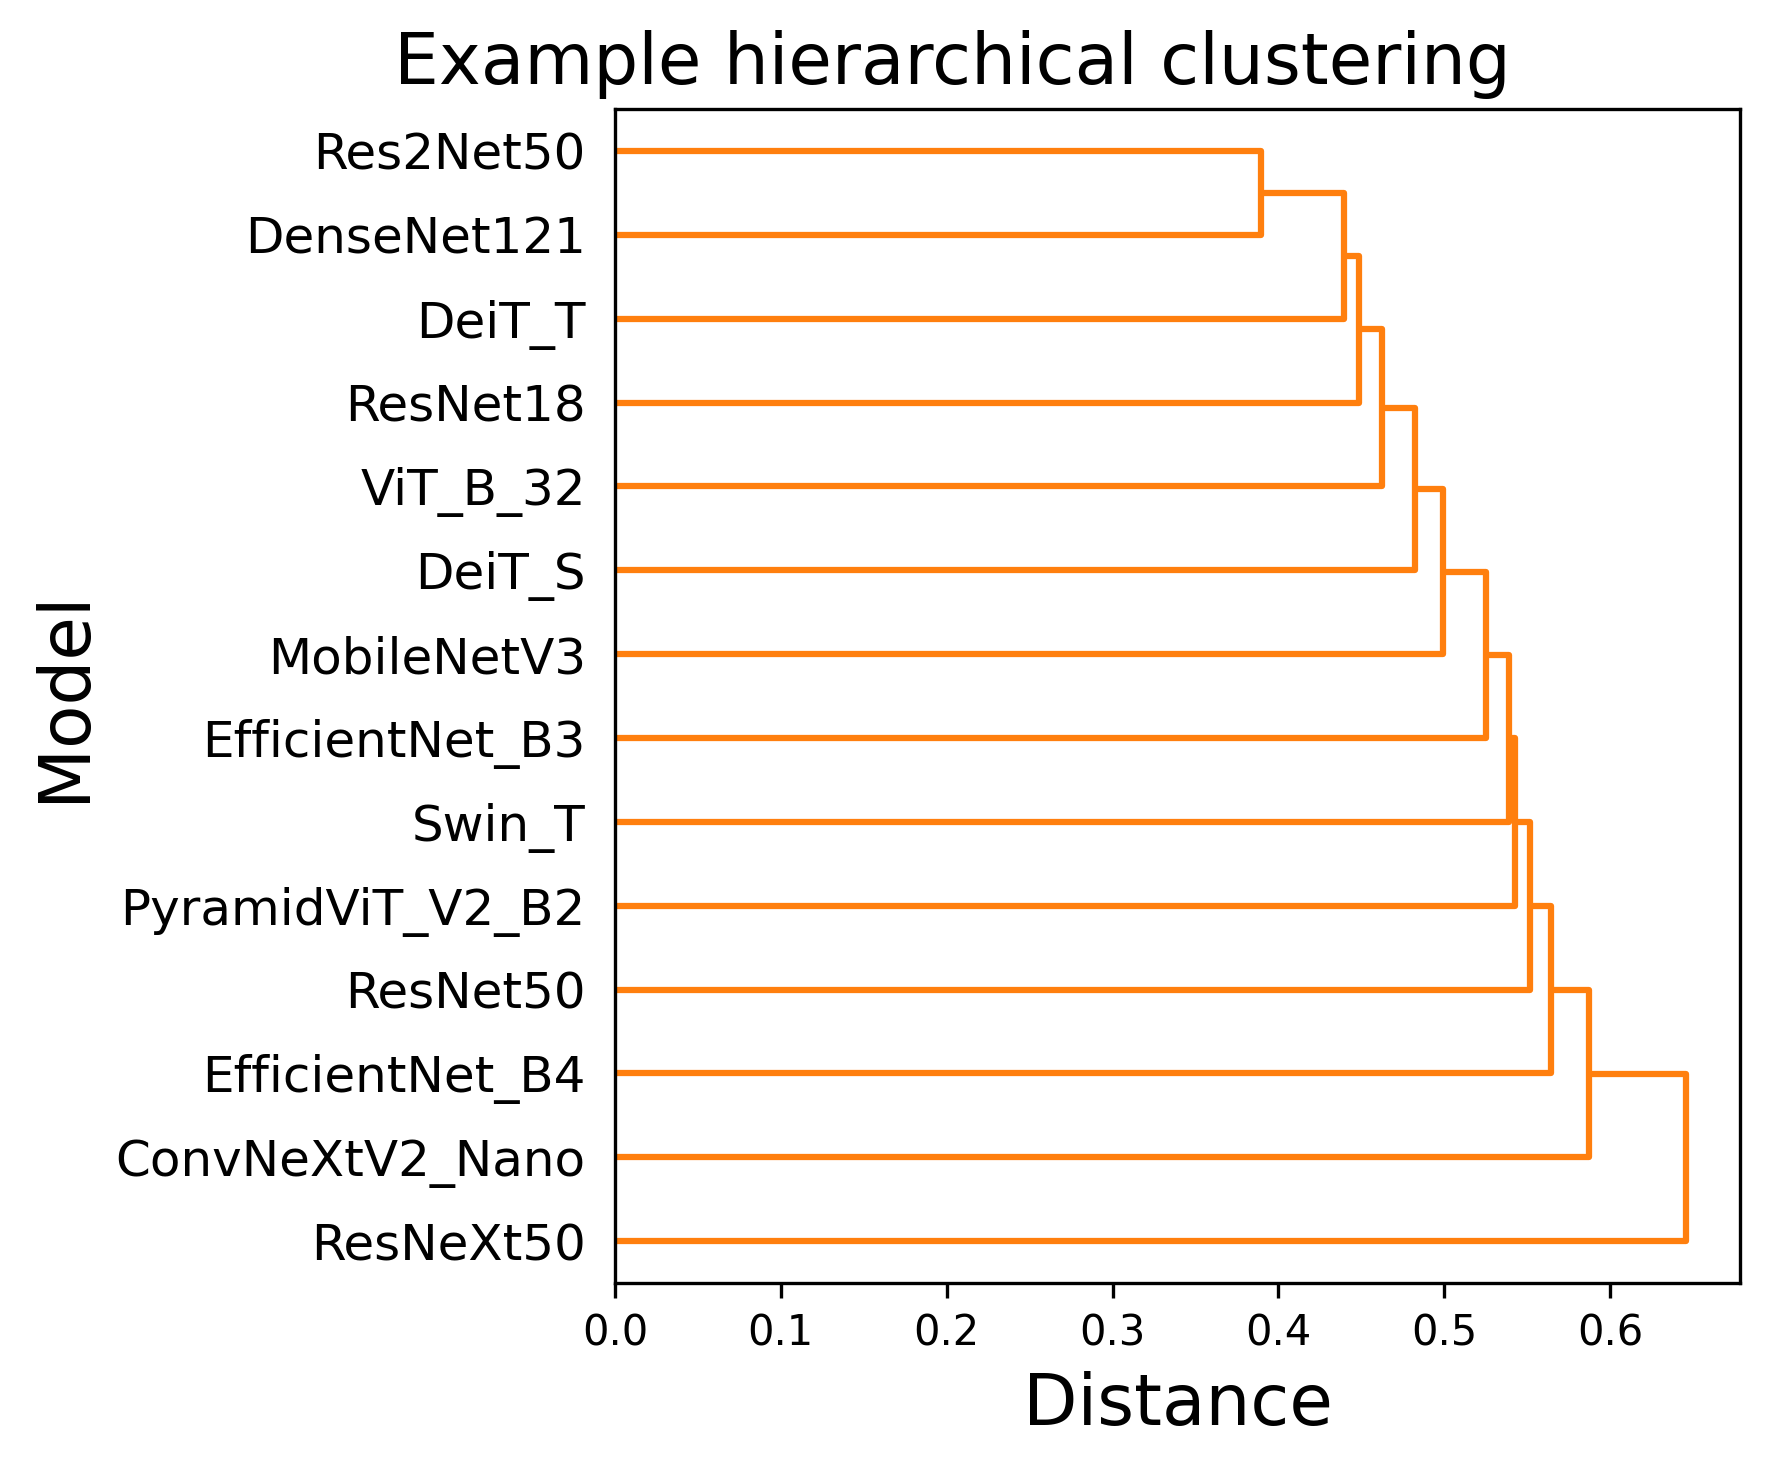

cluster
ConvNeXtV2_Nano         0
DeiT_S                  1
DeiT_T                  1
DenseNet121             1
EfficientNet_B3         1
EfficientNet_B4         1
MobileNetV3             1
PyramidViT_V2_B2        1
Res2Net50               1
ResNet18                1
ResNet50                1
Swin_T                  1
ViT_B_32                1
ResNeXt50               2

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

def hierarchical_clustering(df, title, output_filename=None, color_threshold=1.04):
    similarity_matrix = df.values
    # convert similarity to distance again
    distance_matrix = 1 - similarity_matrix
    # set diagonal to 0
    condensed_dist_matrix = squareform(distance_matrix)
    Z = linkage(condensed_dist_matrix, method='average')
    plt.figure(figsize=(6, 5), dpi=300)
    dendrogram(Z, labels=df.index, orientation='right', color_threshold=color_threshold) # threshold here matches 3 clusters
    plt.title(title, fontsize=17, x=0.3)
    # move title to be centered not above the plot but a bit to the left
    plt.ylabel('Model', fontsize=17)
    plt.xlabel('Distance', fontsize=17)
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()
    
    # clusters
    clusters = cut_tree(Z, n_clusters=3)
    clusters_df = pd.DataFrame(clusters, index=df.index, columns=['cluster'])
    clusters_df = clusters_df.sort_values(by='cluster')
    
    return Z, clusters_df

Z, clusters = hierarchical_clustering(df, title="Example hierarchical clustering")
clusters


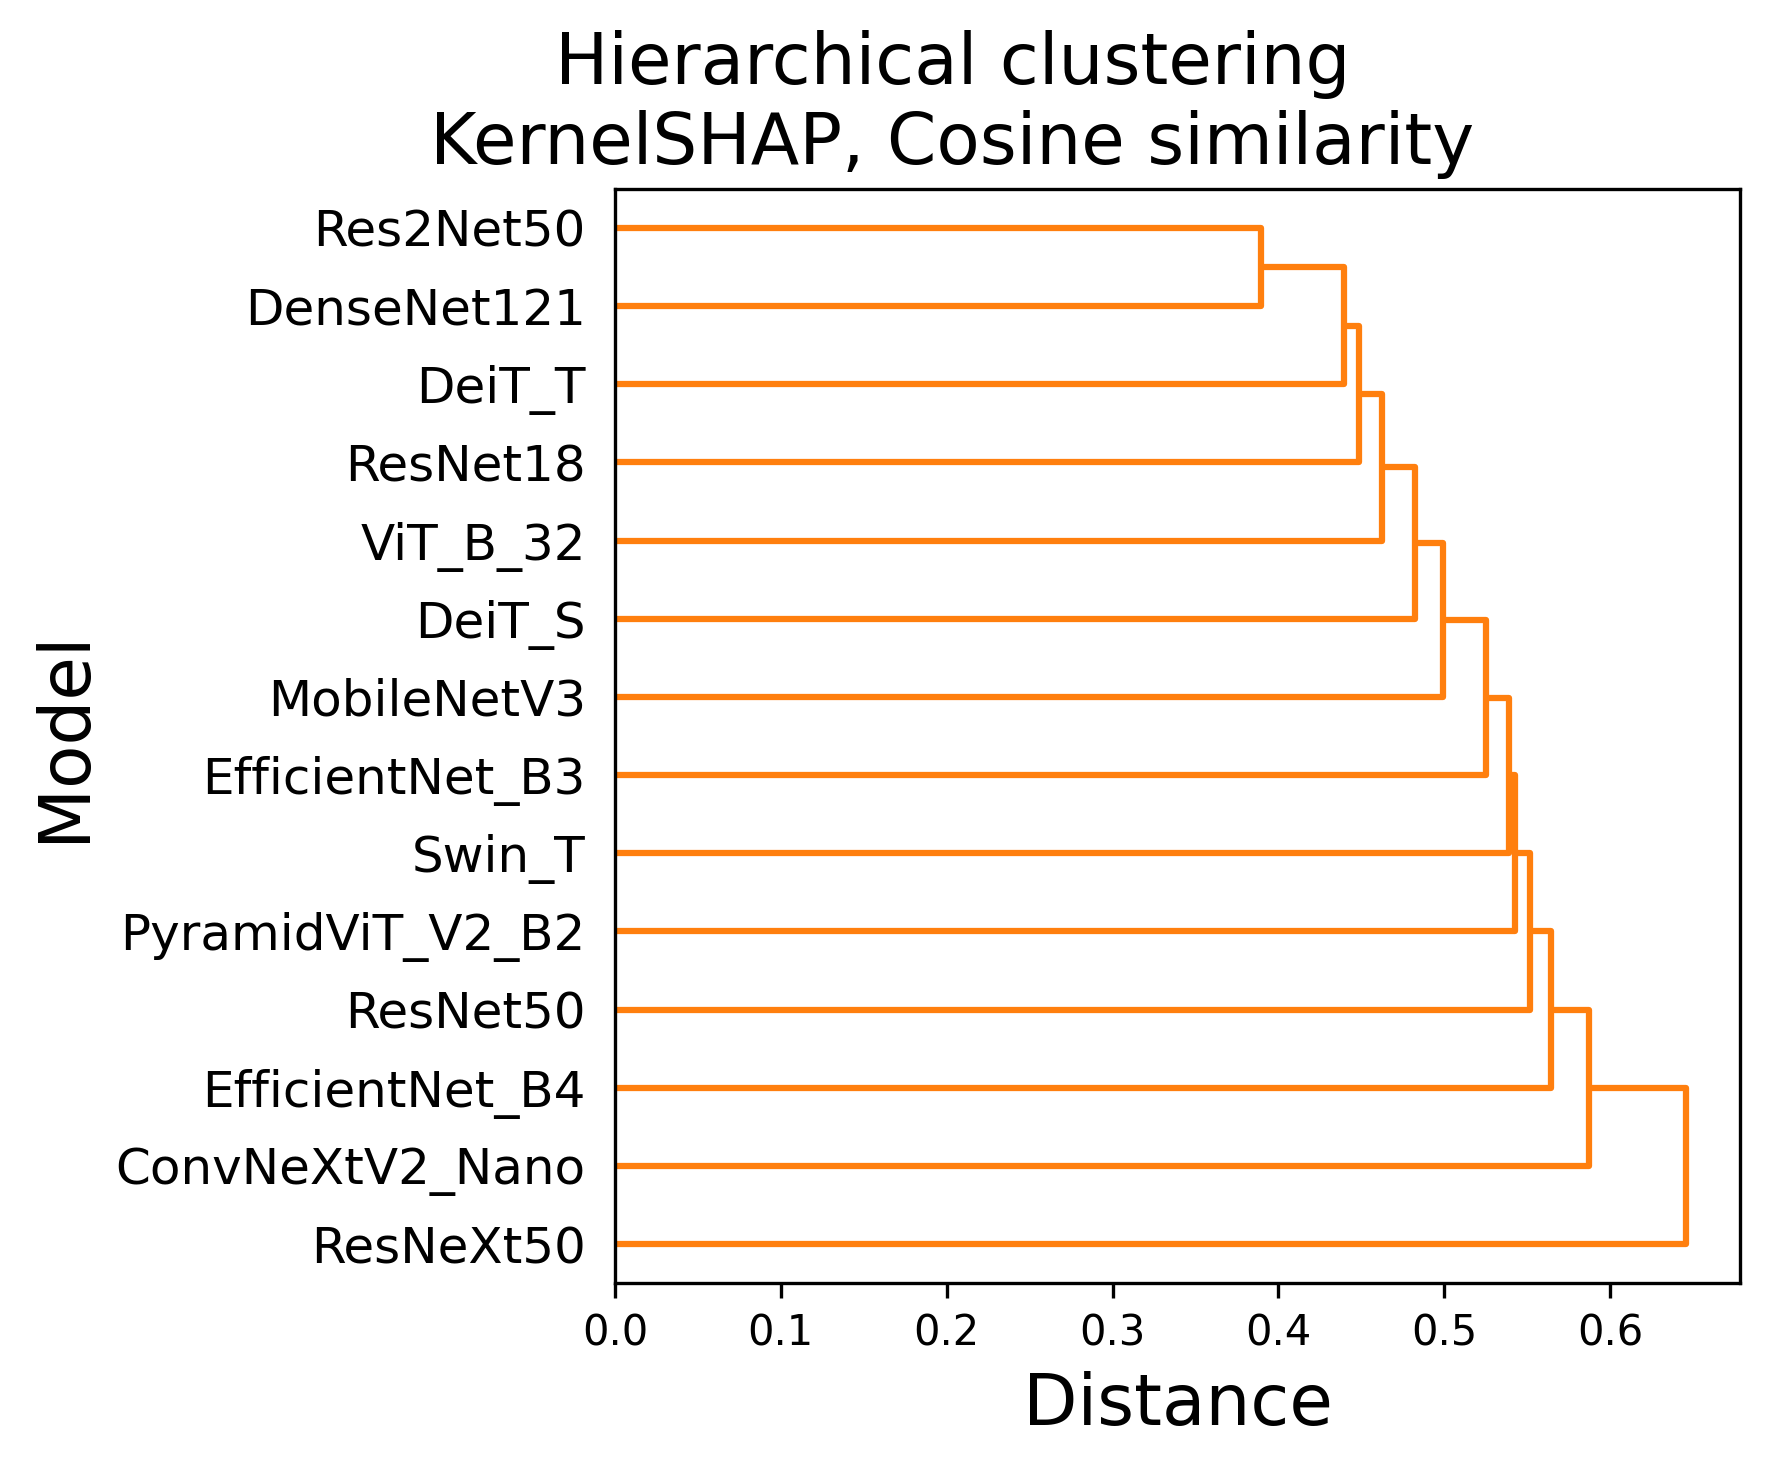

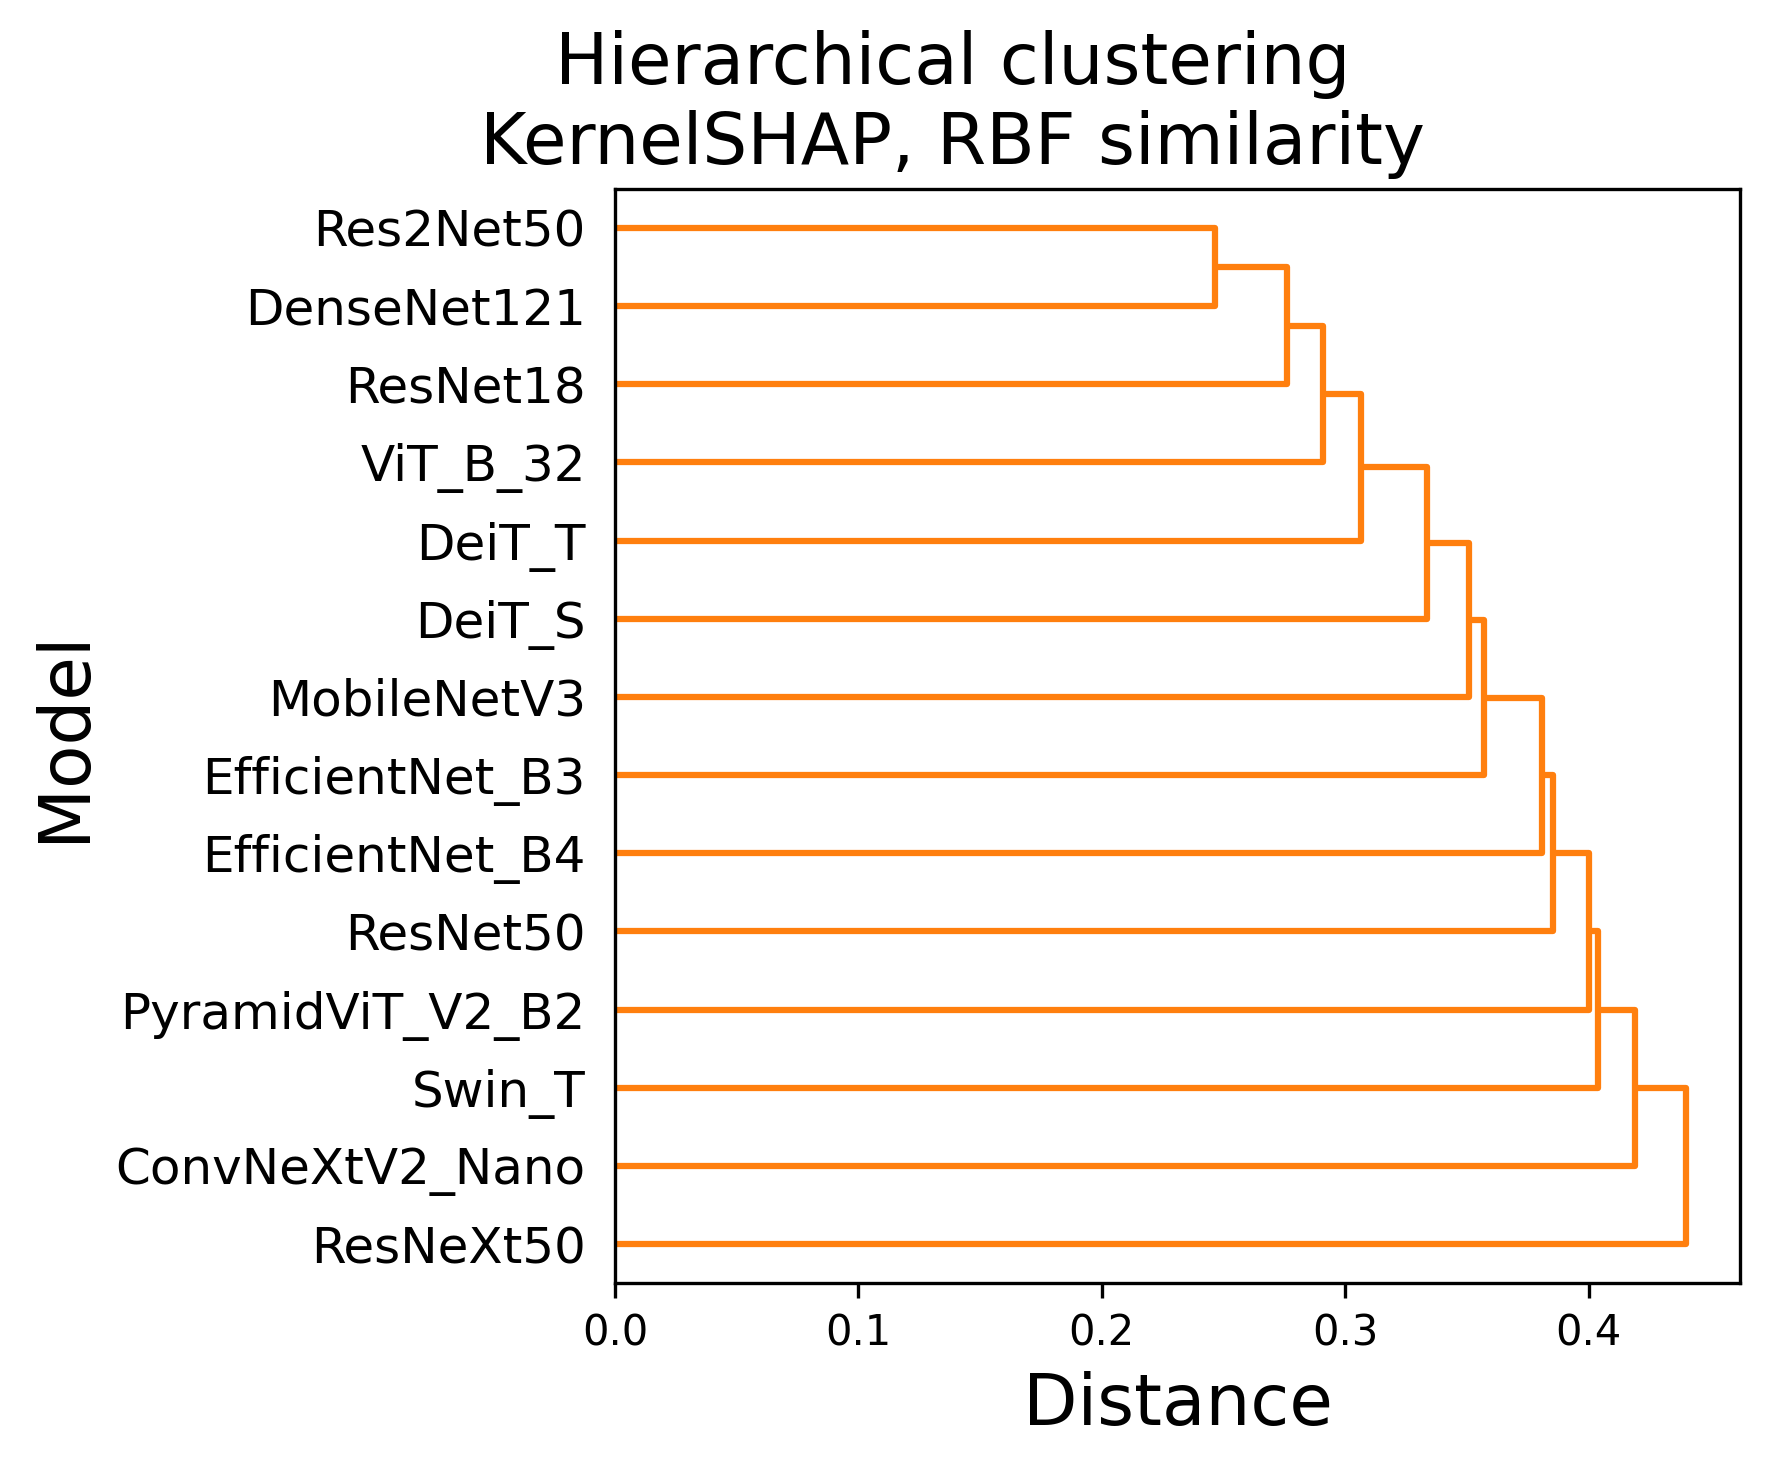

In [14]:
explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
similarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Hierarchical clustering\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
        output_filename = f'dendrogram_hierarchical_{explanation_method}_{similarity_metric}_only_matching.png'
    else:
        output_filename = f'dendrogram_hierarchical_{explanation_method}_{similarity_metric}_all.png'

    # loaded as dissimilarity, so we invert it to similarity by substracting it from 1
    df = 1-pd.read_csv(csv_name, index_col=0)
    np.fill_diagonal(df.values, 1)
    Z, clusters = hierarchical_clustering(df, title=title, output_filename=output_filename, color_threshold=2) # 2 makes all same color